In [1]:
!pip install ucimlrepo pandas seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features 
y = seoul_bike_sharing_demand.data.targets 
  
# metadata 
print(seoul_bike_sharing_demand.metadata) 
  
# variable information 
print(seoul_bike_sharing_demand.variables) 


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [37]:
data = X.join(y)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [75]:
from datetime import datetime

d = datetime.strptime(data['Date'][0], '%m/%d/%Y')
d.day

12

In [40]:
# Peeking into each class
data[data['Functioning Day'] == 'No'][['Date', 'Rented Bike Count', 'Functioning Day']]

,Date,Rented Bike Count,Functioning Day
3144,11/4/2018,0,No
3145,11/4/2018,0,No
3146,11/4/2018,0,No
3147,11/4/2018,0,No
3148,11/4/2018,0,No
...,...,...,...
8251,9/11/2018,0,No
8252,9/11/2018,0,No
8253,9/11/2018,0,No
8254,9/11/2018,0,No


In [44]:
# Peeking into each class
data[data['Functioning Day'] == 'Yes'][['Date', 'Rented Bike Count', 'Functioning Day']]

,Date,Rented Bike Count,Functioning Day
0,1/12/2017,254,Yes
1,1/12/2017,204,Yes
2,1/12/2017,173,Yes
3,1/12/2017,107,Yes
4,1/12/2017,78,Yes
...,...,...,...
8755,30/11/2018,1003,Yes
8756,30/11/2018,764,Yes
8757,30/11/2018,694,Yes
8758,30/11/2018,712,Yes


<Axes: xlabel='Rented Bike Count', ylabel='Functioning Day'>

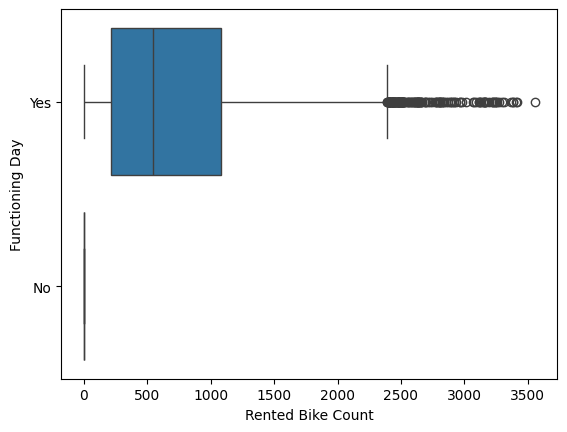

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.boxplot(data=data, x='Rented Bike Count', y='Functioning Day')


<Axes: xlabel='Humidity', ylabel='Functioning Day'>

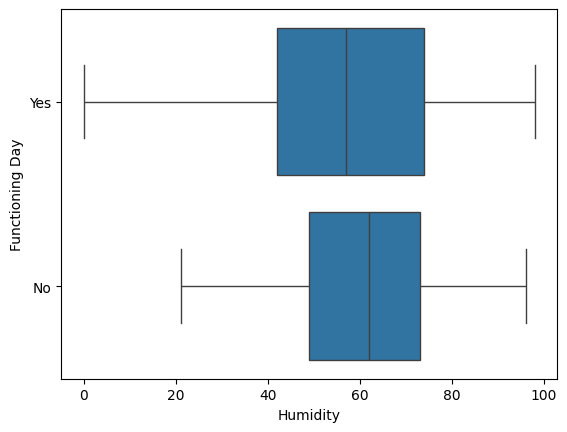

In [43]:
sns.boxplot(data=data, x='Humidity', y='Functioning Day')

<Axes: xlabel='Temperature', ylabel='Functioning Day'>

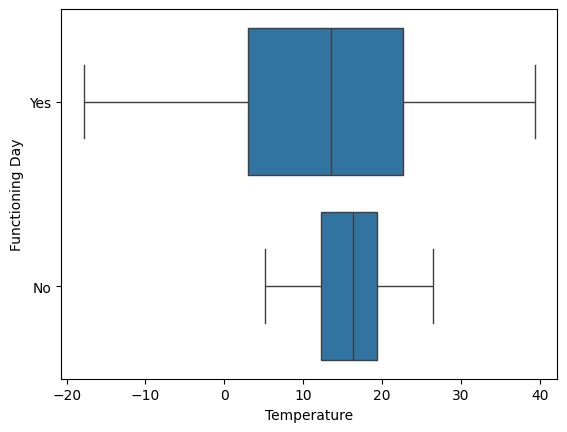

In [36]:
sns.boxplot(data=data, x='Temperature', y='Functioning Day')

<Axes: xlabel='Wind speed', ylabel='Functioning Day'>

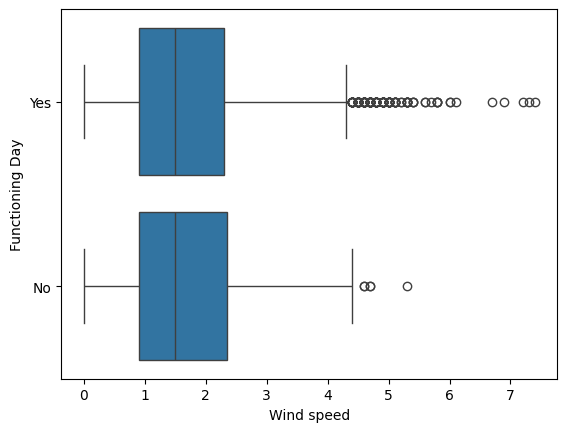

In [47]:
sns.boxplot(data=data, x='Wind speed', y='Functioning Day')

<Axes: xlabel='Visibility', ylabel='Functioning Day'>

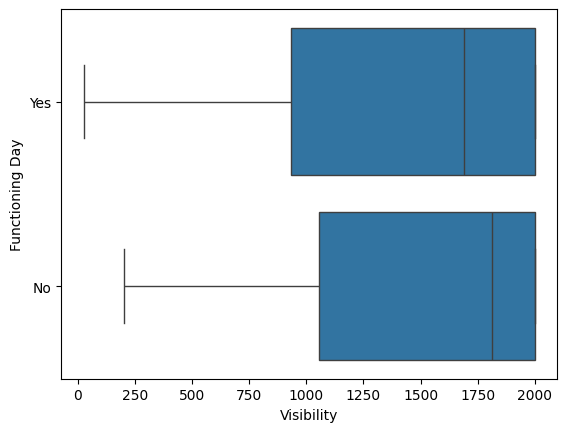

In [48]:
sns.boxplot(data=data, x='Visibility', y='Functioning Day')

<Axes: xlabel='Dew point temperature', ylabel='Functioning Day'>

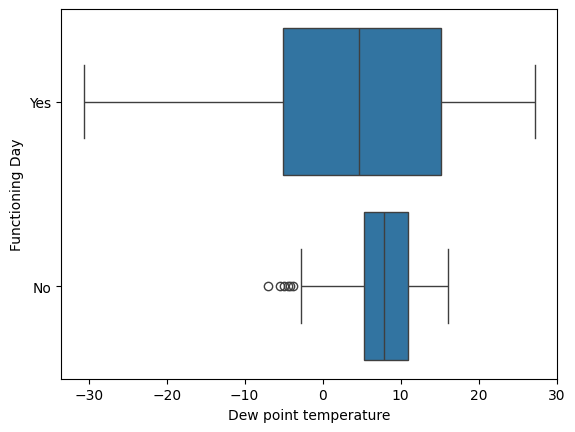

In [49]:
sns.boxplot(data=data, x='Dew point temperature', y='Functioning Day')

<Axes: xlabel='Solar Radiation', ylabel='Functioning Day'>

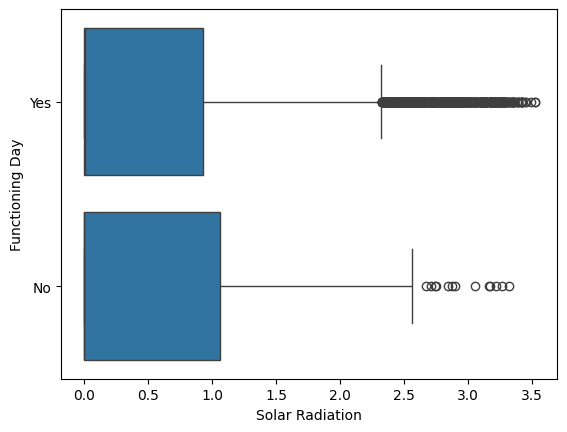

In [54]:
sns.boxplot(data=data, x='Solar Radiation', y='Functioning Day')

<Axes: xlabel='Rainfall', ylabel='Functioning Day'>

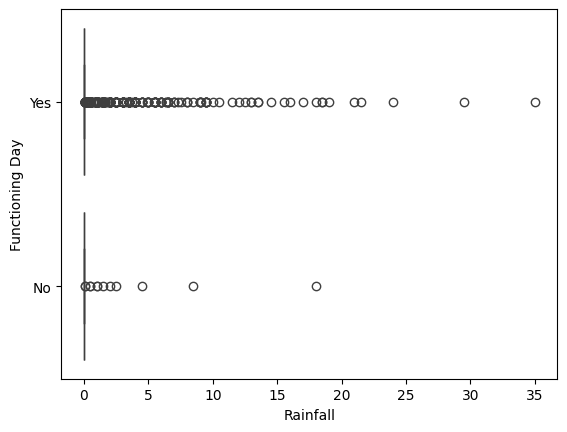

In [51]:
sns.boxplot(data=data, x='Rainfall', y='Functioning Day')

<Axes: xlabel='Snowfall', ylabel='Functioning Day'>

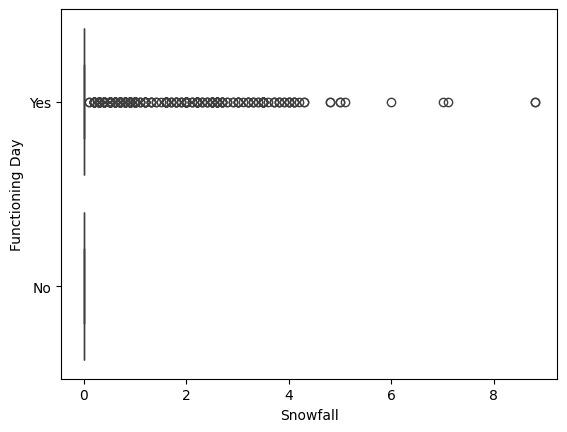

In [57]:
sns.boxplot(data=data, x='Snowfall', y='Functioning Day')

In [61]:
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

categorical_features = ['Seasons']
date_features = ['Date']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

def extract_date_components(date_column):
    def extract_date_features(df):
    item = datetime.strptime(d, '%m/%d/%Y')
    return item.month, item.day, item.year

date_transformer = Pipeline(steps=[
    ('extract', Pipeline),
])

ValueError: could not convert string to float: '1/12/2017'